In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

curr = Path.cwd() 
path = curr.parent.parent
file = str(path)
file+="/data_cleanup/cleaned_data.csv"
print(file)

/home/matijak/Documents/programiranje/lumen/data_cleanup/cleaned_data.csv


In [3]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557


In [4]:
df = df[df["status_rezervacije"] == "Check-Out"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74414 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     74414 non-null  int64  
 1   hotel_id                       74414 non-null  int64  
 2   datum_dolaska                  74414 non-null  object 
 3   datum_kreiranja_rezervacije    74414 non-null  object 
 4   datum_odjave                   74414 non-null  object 
 5   datum_otkazivanja_rezervacije  0 non-null      object 
 6   broj_odraslih_gostiju          74414 non-null  int64  
 7   broj_djece_gostiju             74414 non-null  float64
 8   zemlja_gosta                   74414 non-null  object 
 9   kanal_prodaje_id               74414 non-null  int64  
 10  tip_sobe_id                    74414 non-null  int64  
 11  cijena_nocenja                 74414 non-null  float64
 12  status_rezervacije             74414 non-null  obje

In [5]:
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_otkazivanja_rezervacije'] = pd.to_datetime(df['datum_otkazivanja_rezervacije'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74414 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     74414 non-null  int64         
 1   hotel_id                       74414 non-null  int64         
 2   datum_dolaska                  74414 non-null  datetime64[ns]
 3   datum_kreiranja_rezervacije    74414 non-null  datetime64[ns]
 4   datum_odjave                   74414 non-null  object        
 5   datum_otkazivanja_rezervacije  0 non-null      datetime64[ns]
 6   broj_odraslih_gostiju          74414 non-null  int64         
 7   broj_djece_gostiju             74414 non-null  float64       
 8   zemlja_gosta                   74414 non-null  object        
 9   kanal_prodaje_id               74414 non-null  int64         
 10  tip_sobe_id                    74414 non-null  int64         
 11  cijena_nocenja      

In [6]:
df['ukupan_broj_gostiju'] = df['broj_odraslih_gostiju'] + df['broj_djece_gostiju']
occupancy = df[(df['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

,datum,broj_gostiju
0,2015-01-01,10.0
1,2015-01-02,16.0
2,2015-01-03,19.0
3,2015-01-04,24.0
4,2015-01-05,25.0


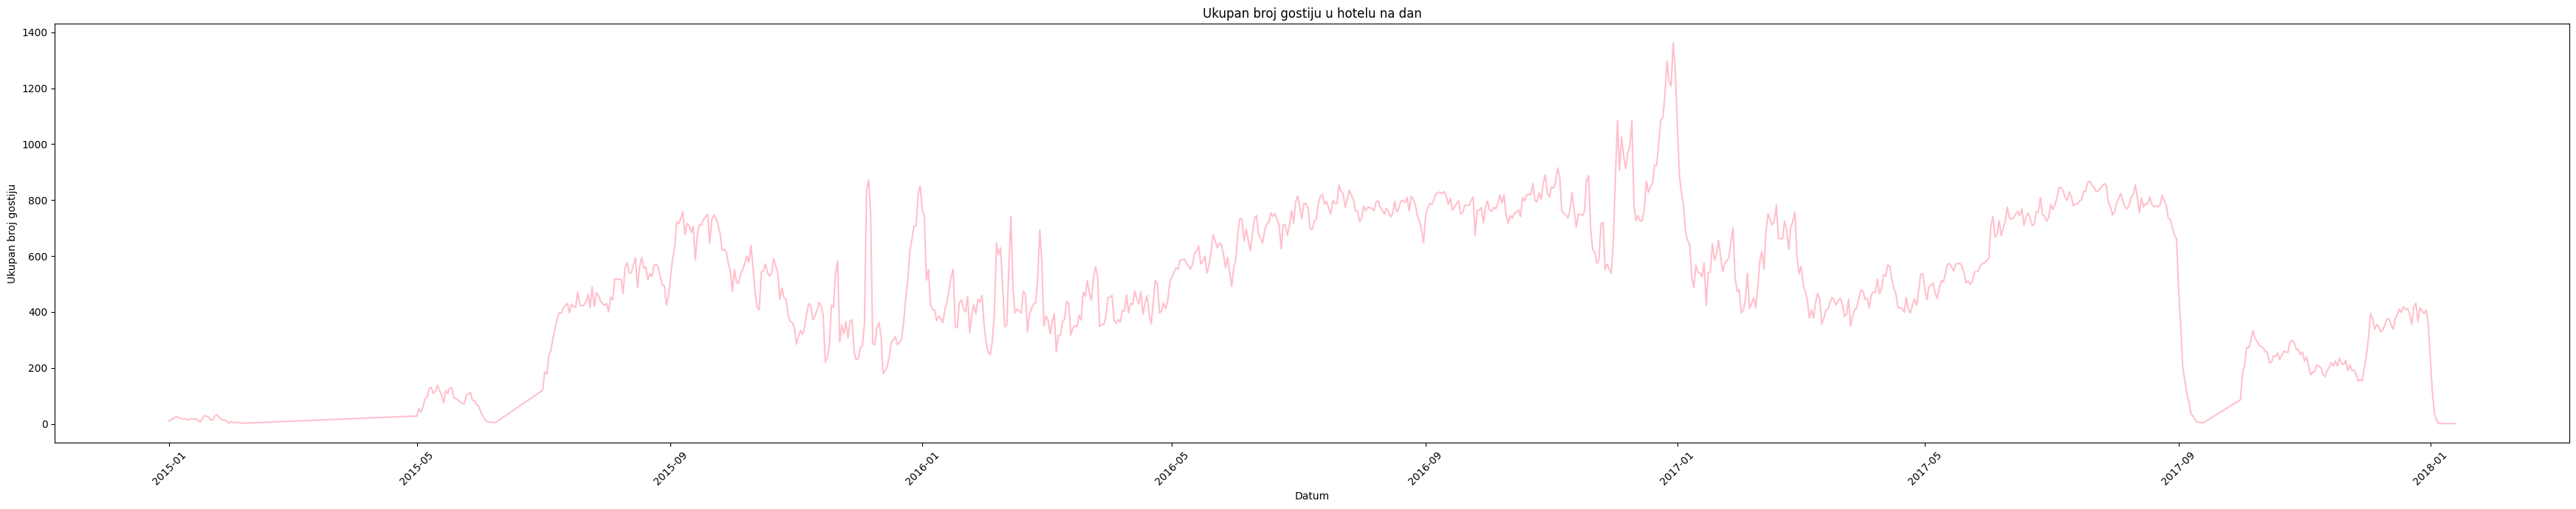

In [7]:
plt.figure(figsize=(35, 7))  # Prilagodite veličinu prema potrebi
plt.plot(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

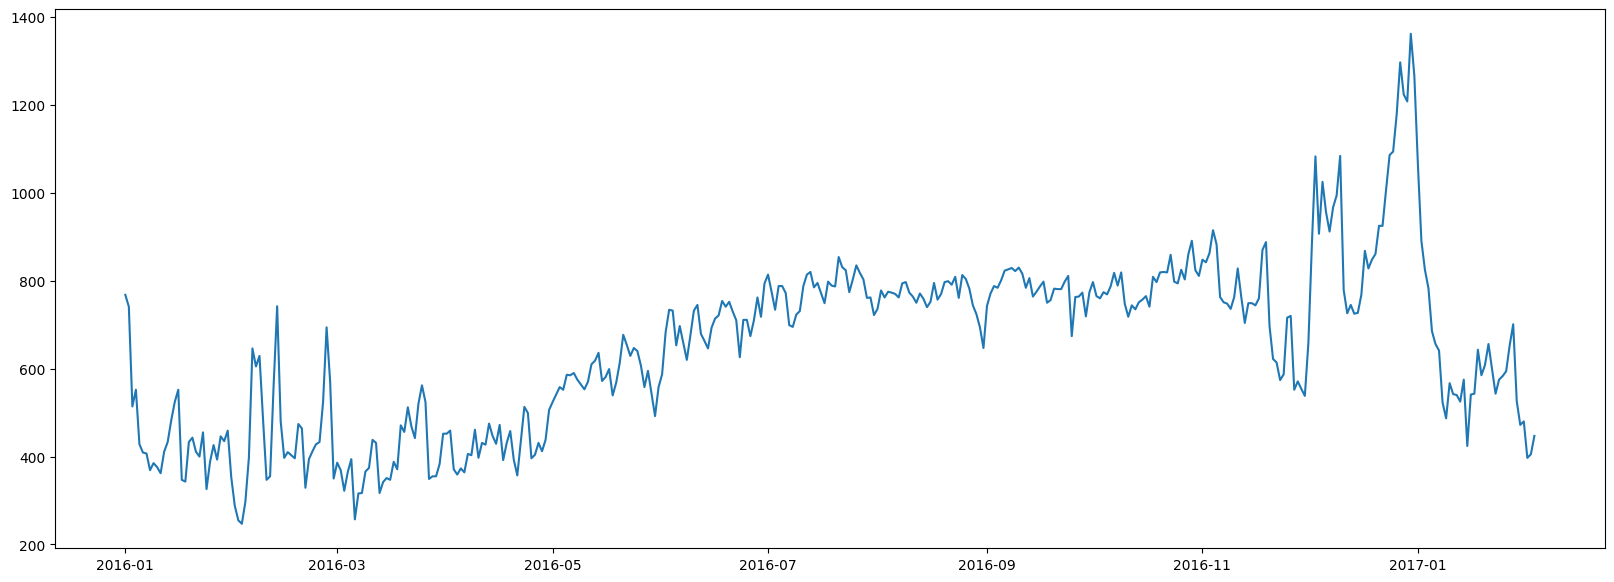

In [8]:
train = final_df[(final_df["datum"] >= datetime(2016,1,1)) &  (final_df["datum"] <= datetime(2017,2,3))]
train.head()
plt.figure(figsize=(20, 7))
plt.plot(train["datum"],train["broj_gostiju"])

         datum  broj_gostiju
686 2017-03-03         500.0
687 2017-03-04         472.0
688 2017-03-05         444.0
689 2017-03-06         378.0
690 2017-03-07         407.0


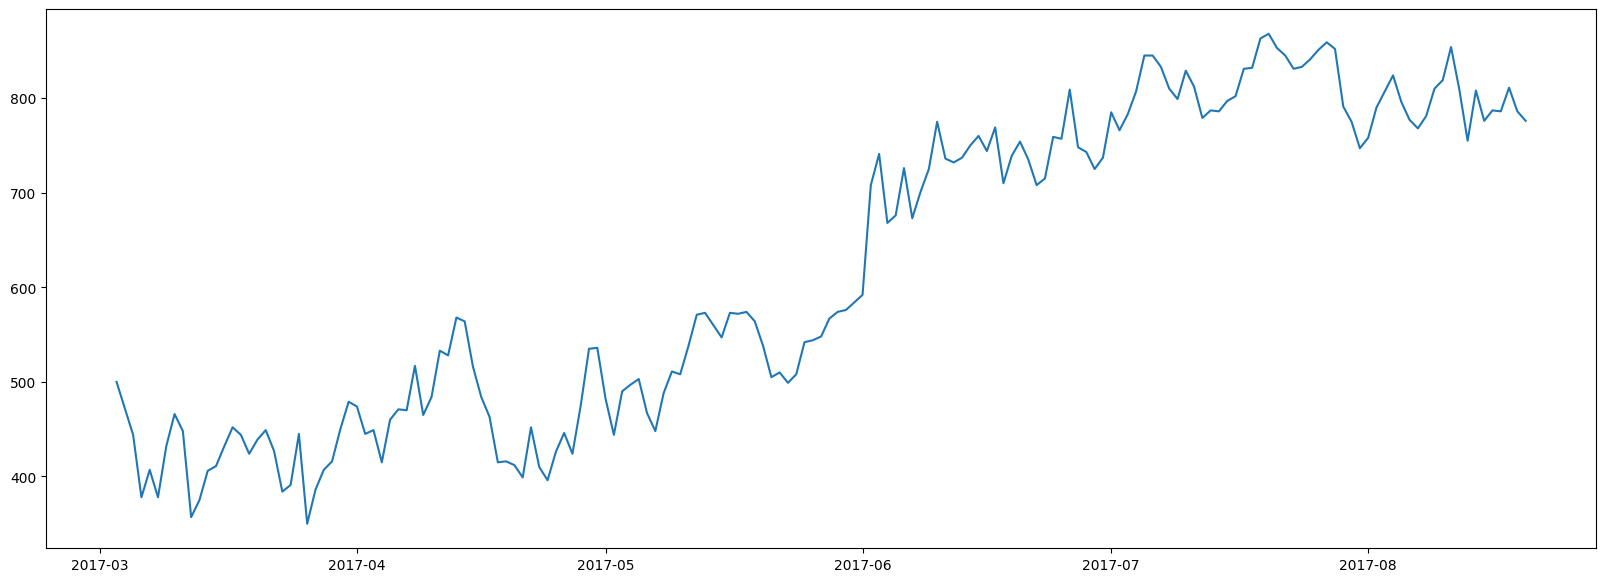

In [9]:
test = final_df[(final_df["datum"] >= datetime(2017,3,3)) &  (final_df["datum"] <= datetime(2017,8,20))]
print(test.head())
plt.figure(figsize=(20, 7))
plt.plot(test["datum"],test["broj_gostiju"])

In [26]:
from pmdarima import auto_arima
df2 = final_df[(final_df["datum"] >= datetime(2015,8,30)) &  (final_df["datum"] <= datetime(2017,8,20))]
df2.index = df2["datum"]
print(df2.head())

                datum  broj_gostiju
datum                              
2015-08-30 2015-08-30         425.0
2015-08-31 2015-08-31         457.0
2015-09-01 2015-09-01         523.0
2015-09-02 2015-09-02         590.0
2015-09-03 2015-09-03         629.0


In [36]:
from statsmodels.tsa.arima.model import ARIMA
train2 = df2.iloc[:-30]
test2 = df2.iloc[-30:]
print(train2.shape)
print(test2.shape)

(692, 2)
(30, 2)


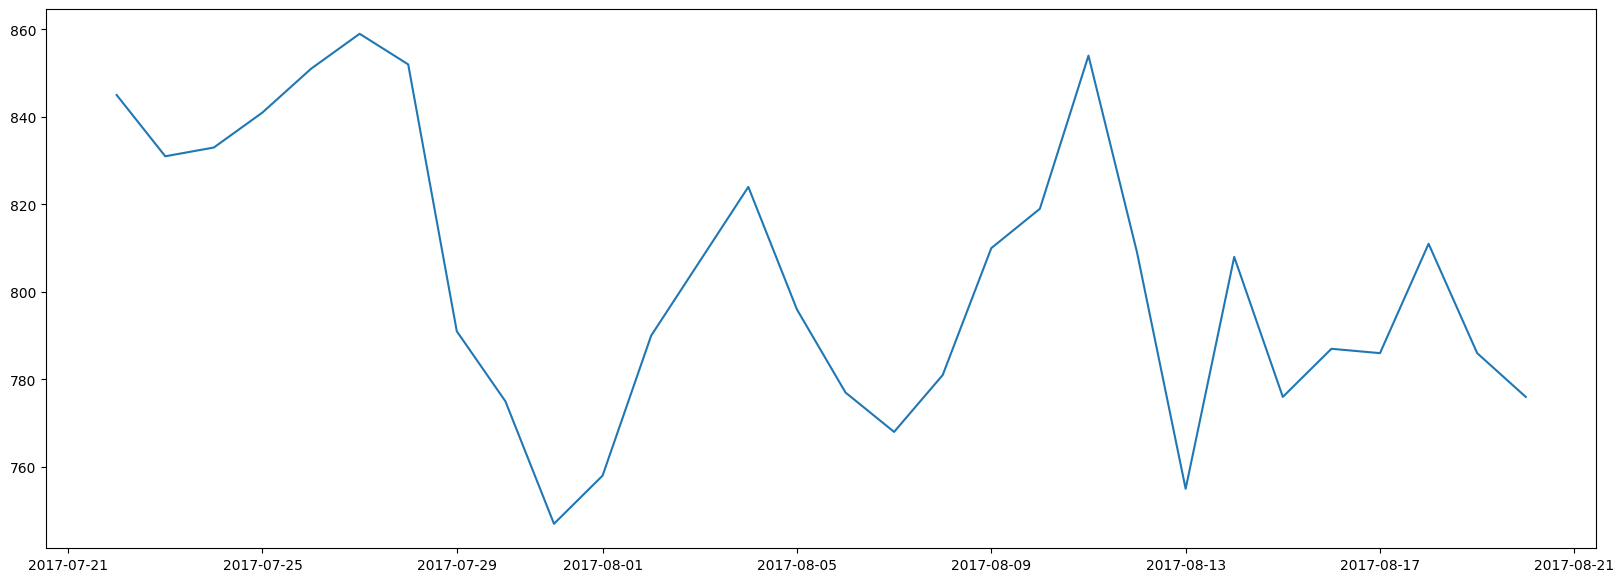

In [37]:
plt.figure(figsize=(20, 7))
plt.plot(test2["datum"],test2["broj_gostiju"])

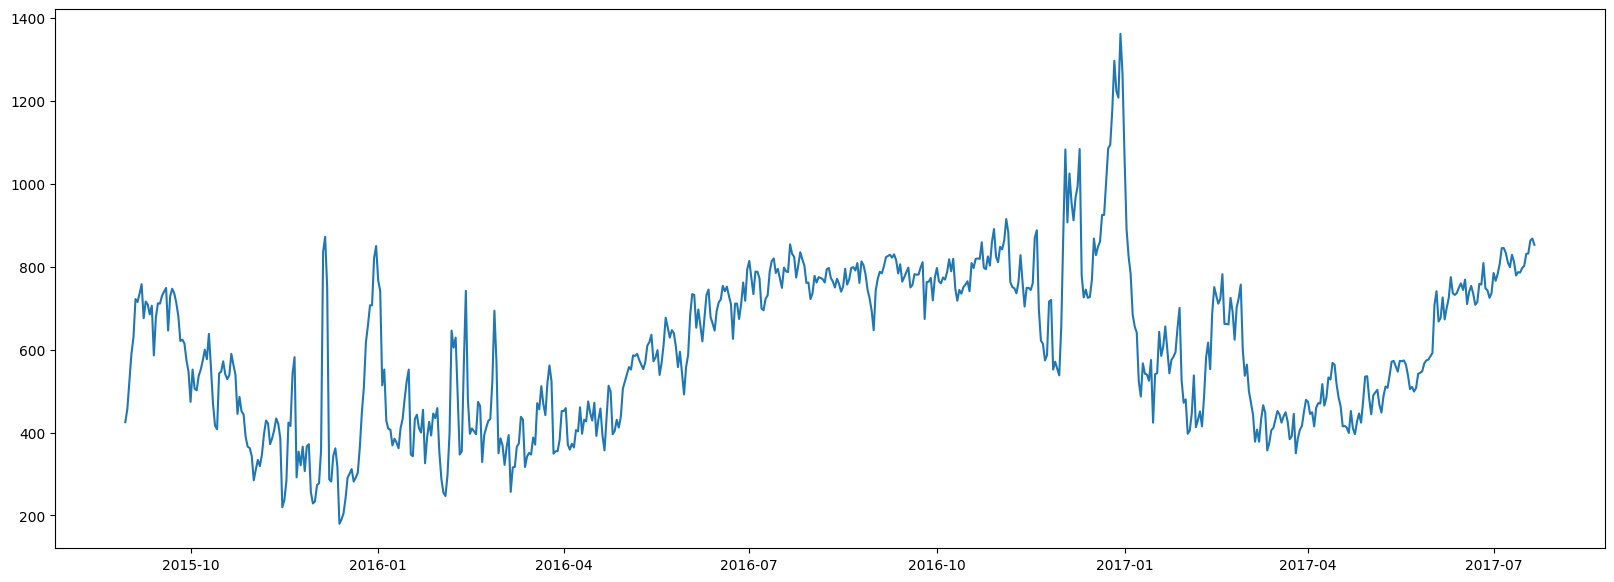

In [38]:
plt.figure(figsize=(20, 7))
plt.plot(train2["datum"],train2["broj_gostiju"])

In [39]:
model = auto_arima(train2["broj_gostiju"],seasonal = False, trace = True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7698.432, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7729.064, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7729.750, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7729.310, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7727.127, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7696.471, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7719.283, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7706.795, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7698.393, Time=0.55 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7706.878, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7697.372, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7697.527, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7694.659, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7717.363, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  692
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -3843.330
Date:                Wed, 06 Mar 2024   AIC                           7694.659
Time:                        15:20:36   BIC                           7712.812
Sample:                    08-30-2015   HQIC                          7701.681
                         - 07-21-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7733      0.034     22.479      0.000       0.706       0.841
ma.L1         -0.7674      0.049    -15.763      0.000      -0.863      -0.672
ma.L2         -0.1584      0.036     -4.452      0.000      -0.228      -0.089
sigma2      3965.7365    107.792     36.791      0.000    3754.469    4177.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2028.10
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
mod = ARIMA(train2['broj_gostiju'], order = (1,1,2))
mod = mod.fit()
mod.summary()

/home/matijak/Documents/programiranje/lumen/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/matijak/Documents/programiranje/lumen/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/matijak/Documents/programiranje/lumen/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           broj_gostiju   No. Observations:                  692
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3843.330
Date:                Wed, 06 Mar 2024   AIC                           7694.659
Time:                        15:20:42   BIC                           7712.812
Sample:                    08-30-2015   HQIC                          7701.681
                         - 07-21-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7733      0.034     22.479      0.000       0.706       0.841
ma.L1         -0.7674      0.049    -15.763      0.000      -0.863      -0.672
ma.L2         -0.1584      0.036     -4.452      0.000      -0.228      -0.089
sigma2      3965.7365    107.792     36.791      0.000    3754.469    4177.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2028.10
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

692 721
DatetimeIndex(['2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02',
               '2015-09-03', '2015-09-04', '2015-09-05', '2015-09-06',
               '2015-09-07', '2015-09-08',
               ...
               '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
               '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-19', '2017-08-20'],
              dtype='datetime64[ns]', name='datum', length=722, freq=None)
2017-07-22    841.954003
2017-07-23    833.924857
2017-07-24    827.715645
2017-07-25    822.913852
2017-07-26    819.200462
2017-07-27    816.328772
2017-07-28    814.107997
2017-07-29    812.390596
2017-07-30    811.062472
2017-07-31    810.035388
2017-08-01    809.241110
2017-08-02    808.626867
2017-08-03    808.151853
2017-08-04    807.784508
2017-08-05    807.500427
2017-08-06    807.280739
2017-08-07    807.110846
2017-08-08    806.979462
2017-08-09    806.877858
2017-08-10    806.799285
2017-08-11    806.738521
20

<Axes: xlabel='datum'>

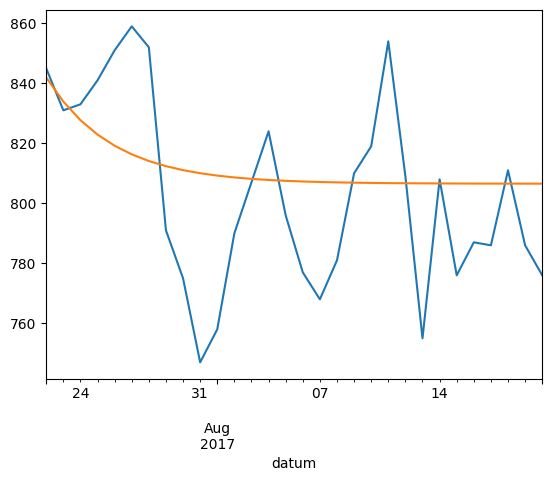

In [41]:
start = len(train2)
end = len(test2) + len(train2) - 1
 
print(start,end)
pred = mod.predict(start = start, end = end)

print(df2.index)
print(pred)
#plt.plot(pred["datum"],legend=True)
test2["broj_gostiju"].plot()
pred.plot()